# Exercício de Análise de Dados com Python
#### Realizar a análise do arquivo `chamada.xlsx` do diretório `datasets/univille`

- Quantos alunos únicos frequentaram cada curso?
- Quantos alunos de cada curso de graduação frenquentou cada curso?
- Quantas horas complementares cada aluno irá receber? (cada registro é 1 hora)
- Como foi a avaliação por curso?
- Como foi a avaliação do curso por curso de graduação?

#### Importante
- Grupo Programação (terça, quarta, em alguns casos sexta);
- Grupo AWS (quinta);

# Passo 1
#### Importar as dependências
- Utilizar a biblioteca `pandas` com alias `pd`;
- Utilizar a biblioteca `datetime`;
- Utilizar a biblioteca `matplotlib` com alias `plt`;

In [158]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Passo 2
#### Importar o arquivo
- Utilizar o comando `read_excel` da biblioteca `pandas`;

In [159]:
nomeArquivoChamada = 'datasets/univille/chamada.xlsx'
dfChamada = pd.read_excel(nomeArquivoChamada)
print(type(dfChamada))
dfChamada

<class 'pandas.core.frame.DataFrame'>


,ID,Hora de início,Coluna1,Coluna2,Hora de conclusão,Email,Nome,Nome completo e legível2,Curso,Série,Seu E-mail da UNIVILLE2,O curso foi relevante para sua formação?,Você gostou do curso que participou?,O instrutor tinha domínio sobre o assunto lecionado?,Você faria esse curso novamente?
0,1,2020-08-25 18:07:40,2020-08-25,3,2020-08-25 18:08:23,anonymous,NaN,Arthur,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Arthur@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
1,2,2020-08-25 18:07:49,2020-08-25,3,2020-08-25 18:08:33,anonymous,NaN,Nathan,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Nathan@gmail.com,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
2,3,2020-08-25 18:07:50,2020-08-25,3,2020-08-25 18:08:36,anonymous,NaN,Patrick,Bacharelado em Engenharia de Software da UNIV...,1 Série,Patrick@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
3,4,2020-08-25 18:07:59,2020-08-25,3,2020-08-25 18:08:46,anonymous,NaN,Raiana,Bacharelado em Engenharia de Software da UNIV...,2 Série,Raiana@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
4,5,2020-08-25 18:07:46,2020-08-25,3,2020-08-25 18:08:49,anonymous,NaN,Haniel,Bacharelado em Engenharia de Software da UNIV...,2 Série,Haniel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,2020-11-12 18:56:17,2020-11-12,5,2020-11-12 18:56:42,anonymous,NaN,Gabriel,Bacharelado em Engenharia de Software da UNIV...,1 Série,Gabriel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
486,487,2020-11-12 18:56:17,2020-11-12,5,2020-11-12 18:56:48,anonymous,NaN,Roberto,Bacharelado em Engenharia de Software da UNIV...,1 Série,Roberto@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
487,488,2020-11-12 18:56:42,2020-11-12,5,2020-11-12 18:57:03,anonymous,NaN,Djonatan,Bacharelado em Engenharia de Software da UNIV...,1 Série,Djonatan@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
488,489,2020-11-12 18:56:18,2020-11-12,5,2020-11-12 18:57:18,anonymous,NaN,Rafael,Bacharelado em Engenharia de Software da UNIV...,2 Série,Rafael@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente


# Passo 3
#### Tratamento dos dados
- Remover colunas desnecessárias;
- Renomear colunas;
- Ajustar dados;

In [160]:
colunasRemovidas = [
  'Coluna1',
  'Coluna2',
  'Hora de conclusão',
  'Email',
  'Nome'
]
colunasRenomeadas = {
  'ID': 'id',
  'Hora de início': 'dataInicio',
  'Nome completo e legível2': 'nome',
  'Curso': 'curso',
  "Série": 'serie',
  'Seu E-mail da UNIVILLE2': 'email',
  'O curso foi relevante para sua formação?': 'cursoFoiRelevante',
  'Você gostou do curso que participou?': 'gostouCursoParticipou',
  'O instrutor tinha domínio sobre o assunto lecionado?': 'instrutorDomincioAssunto',
  'Você faria esse curso novamente?': 'fariaNovamente'
}

dfChamada.drop(colunasRemovidas, axis=1, inplace=True)
dfChamada.rename(columns=colunasRenomeadas, inplace=True)
dfChamada['nome'] = dfChamada['nome'].str.lower()
dfChamada['nome'] = dfChamada['nome'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dfChamada

,id,dataInicio,nome,curso,serie,email,cursoFoiRelevante,gostouCursoParticipou,instrutorDomincioAssunto,fariaNovamente
0,1,2020-08-25 18:07:40,arthur,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Arthur@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
1,2,2020-08-25 18:07:49,nathan,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Nathan@gmail.com,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
2,3,2020-08-25 18:07:50,patrick,Bacharelado em Engenharia de Software da UNIV...,1 Série,Patrick@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
3,4,2020-08-25 18:07:59,raiana,Bacharelado em Engenharia de Software da UNIV...,2 Série,Raiana@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
4,5,2020-08-25 18:07:46,haniel,Bacharelado em Engenharia de Software da UNIV...,2 Série,Haniel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
...,...,...,...,...,...,...,...,...,...,...
485,486,2020-11-12 18:56:17,gabriel,Bacharelado em Engenharia de Software da UNIV...,1 Série,Gabriel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
486,487,2020-11-12 18:56:17,roberto,Bacharelado em Engenharia de Software da UNIV...,1 Série,Roberto@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
487,488,2020-11-12 18:56:42,djonatan,Bacharelado em Engenharia de Software da UNIV...,1 Série,Djonatan@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
488,489,2020-11-12 18:56:18,rafael,Bacharelado em Engenharia de Software da UNIV...,2 Série,Rafael@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente


# Passo 4
#### Identificar o dia da semana
- Criar uma função `lamda` que retorna o dia da semana de uma data;
- Criar uma nova série mapeando a coluna de data para o dia da semana;
- Adicionar a nova coluna no `dfChamada`;

In [161]:
DIASSEMANA = [
  'Segunda-feira',
  'Terça-feira',
  'Quarta-feira',
  'Quinta-Feira',
  'Sexta-feira',
  'Sábado',
  'Domingo'
]

fnRetornaDiaSemana = lambda d : DIASSEMANA[d.weekday()]
novaSerieDiaSemana = dfChamada['dataInicio'].map(fnRetornaDiaSemana)
novaSerieDiaSemana
dfChamada['diaSemana'] = novaSerieDiaSemana
dfChamada

,id,dataInicio,nome,curso,serie,email,cursoFoiRelevante,gostouCursoParticipou,instrutorDomincioAssunto,fariaNovamente,diaSemana
0,1,2020-08-25 18:07:40,arthur,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Arthur@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira
1,2,2020-08-25 18:07:49,nathan,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Nathan@gmail.com,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira
2,3,2020-08-25 18:07:50,patrick,Bacharelado em Engenharia de Software da UNIV...,1 Série,Patrick@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira
3,4,2020-08-25 18:07:59,raiana,Bacharelado em Engenharia de Software da UNIV...,2 Série,Raiana@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira
4,5,2020-08-25 18:07:46,haniel,Bacharelado em Engenharia de Software da UNIV...,2 Série,Haniel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira
...,...,...,...,...,...,...,...,...,...,...,...
485,486,2020-11-12 18:56:17,gabriel,Bacharelado em Engenharia de Software da UNIV...,1 Série,Gabriel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira
486,487,2020-11-12 18:56:17,roberto,Bacharelado em Engenharia de Software da UNIV...,1 Série,Roberto@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira
487,488,2020-11-12 18:56:42,djonatan,Bacharelado em Engenharia de Software da UNIV...,1 Série,Djonatan@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira
488,489,2020-11-12 18:56:18,rafael,Bacharelado em Engenharia de Software da UNIV...,2 Série,Rafael@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira


# Passo 5
#### Identificar o grupo
- Criar um objeto para mapeamento de dia da semana para o grupo;
- Adicionar uma nova coluna com a informação do grupo;

#### Importante
- Grupo Programação (terça, quarta, em alguns casos sexta);
- Grupo AWS (quinta);

In [162]:
diaSemanaParaGrupo = {
  'Segunda-feira': 'Grupo não identificado',
  'Terça-feira': 'Grupo Programação',
  'Quarta-feira': 'Grupo Programação',
  'Quinta-Feira': 'Grupo AWS',
  'Sexta-feira': 'Grupo Programação',
  'Sábado': 'Grupo não identificado',
  'Domingo': 'Grupo não identificado'
}

dfChamada['grupo'] = dfChamada['diaSemana'].map(diaSemanaParaGrupo)
dfChamada

,id,dataInicio,nome,curso,serie,email,cursoFoiRelevante,gostouCursoParticipou,instrutorDomincioAssunto,fariaNovamente,diaSemana,grupo
0,1,2020-08-25 18:07:40,arthur,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Arthur@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira,Grupo Programação
1,2,2020-08-25 18:07:49,nathan,Bacharelado em Sistemas de Informação da UNIVILLE,2 Série,Nathan@gmail.com,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira,Grupo Programação
2,3,2020-08-25 18:07:50,patrick,Bacharelado em Engenharia de Software da UNIV...,1 Série,Patrick@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira,Grupo Programação
3,4,2020-08-25 18:07:59,raiana,Bacharelado em Engenharia de Software da UNIV...,2 Série,Raiana@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira,Grupo Programação
4,5,2020-08-25 18:07:46,haniel,Bacharelado em Engenharia de Software da UNIV...,2 Série,Haniel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Terça-feira,Grupo Programação
...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,2020-11-12 18:56:17,gabriel,Bacharelado em Engenharia de Software da UNIV...,1 Série,Gabriel@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira,Grupo AWS
486,487,2020-11-12 18:56:17,roberto,Bacharelado em Engenharia de Software da UNIV...,1 Série,Roberto@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira,Grupo AWS
487,488,2020-11-12 18:56:42,djonatan,Bacharelado em Engenharia de Software da UNIV...,1 Série,Djonatan@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira,Grupo AWS
488,489,2020-11-12 18:56:18,rafael,Bacharelado em Engenharia de Software da UNIV...,2 Série,Rafael@univille.br,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Quinta-Feira,Grupo AWS


# Passo 6
#### Responder: Quantos alunos únicos frequentaram cada curso?

In [163]:
dfChamadaAlunosUnicosPorGrupo = dfChamada.drop_duplicates(subset=["grupo", "nome"])
dfChamadaAlunosUnicosPorGrupo.groupby('grupo').size()

grupo
Grupo AWS            24
Grupo Programação    30
dtype: int64

# Passo 7
#### Responder: Quantos alunos de cada curso de graduação frenquentou cada curso?

In [164]:
dfChamadaAlunosUnicosPorGrupo.groupby(['grupo', 'curso']).size()

grupo              curso                                             
Grupo AWS          Bacharelado em Engenharia de Software  da UNIVILLE    14
                   Bacharelado em Sistemas de Informação da UNIVILLE     10
Grupo Programação  Bacharelado em Engenharia de Software  da UNIVILLE    20
                   Bacharelado em Sistemas de Informação da UNIVILLE     10
dtype: int64

# Passo 8
#### Responder: Quantas horas complementares cada aluno irá receber? (cada registro é 1 hora)

In [165]:
dfChamada.groupby(['nome']).size()

nome
amanda        23
ana            3
arthur        21
beatriz       10
bruno         18
carlos         8
daniel        14
djonatan      17
eduardo        1
elisandro      2
gabriel       29
guilherme      9
gustavo        4
haniel         9
julia         17
larissa       11
leonardo       1
leticia        8
lucas         34
maicon        28
matheus       13
nathan        16
nicolly        9
patrick       20
rafael         9
rafaela       16
raiana        30
renan          7
roberto       24
rodrigo        3
victor        10
vinicius       9
vitor         18
yan           31
yuri           6
dtype: int64

# Passo 9
#### Responder: Como foi a avaliação por curso?

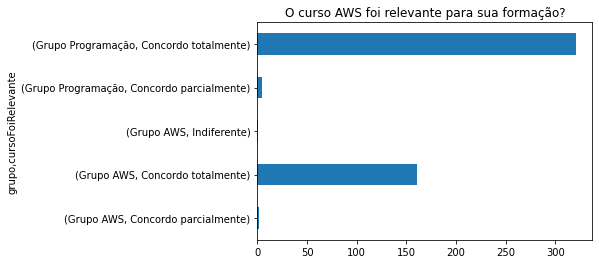

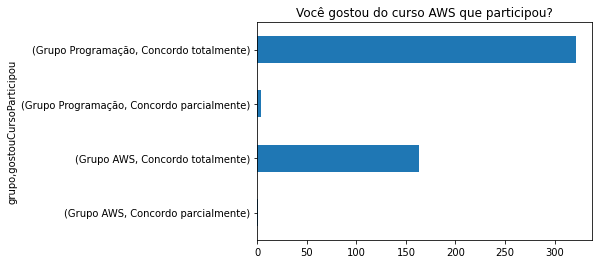

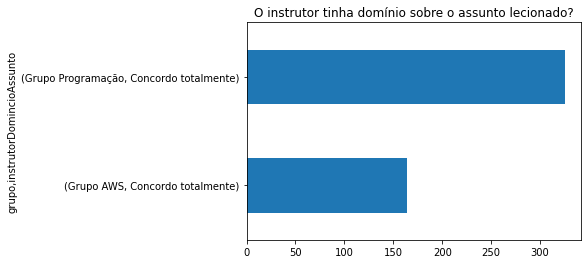

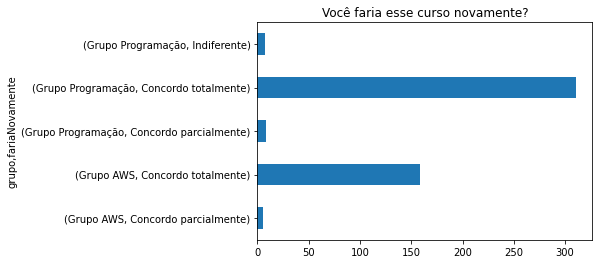

In [166]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('O curso AWS foi relevante para sua formação?')
analiseQuestao1 = dfChamada.groupby(['grupo', 'cursoFoiRelevante'])['cursoFoiRelevante'].count()
analiseQuestao1.plot.barh(ax=ax1)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Você gostou do curso AWS que participou?')
analiseQuestao2 = dfChamada.groupby(['grupo', 'gostouCursoParticipou'])['gostouCursoParticipou'].count()
analiseQuestao2.plot.barh(ax=ax2)

fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.set_title('O instrutor tinha domínio sobre o assunto lecionado?')
analiseQuestao3 = dfChamada.groupby(['grupo', 'instrutorDomincioAssunto'])['instrutorDomincioAssunto'].count()
analiseQuestao3.plot.barh(ax=ax3)

fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
ax4.set_title('Você faria esse curso novamente?')
analiseQuestao4 = dfChamada.groupby(['grupo', 'fariaNovamente'])['fariaNovamente'].count()
analiseQuestao4.plot.barh(ax=ax4)

In [167]:
plt.close('all')